In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lib.helper_functions import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
pd.set_option('display.max_columns', None) 

In [4]:
df = pd.read_csv('data/philosophy_data.csv')

In [5]:
df.head();

In [6]:
i = []

for string in df['sentence_lowered']:
    i.append(count_words(string))

df['word_count'] = i

In [7]:
df.isnull().sum();

In [8]:
df.loc[df['sentence_lowered'].duplicated(keep=False), :];

In [9]:
df2 = df.drop_duplicates('sentence_lowered');

In [10]:
# from transformers import pipeline
# sentiment_pipeline = pipeline("sentiment-analysis")

# sentiment = []
# index = -1
# for sentence in df2['sentence_lowered']:
#     index+=1
#     if(index%10000 == 0):
#         print(index)

#     result = sentiment_pipeline(sentence[:512])[0]
#     sentiment.append(result['score'])
#df2['sentiment_score'] = sentiment

In [11]:
# sentiment = []

# for score in df2['sentiment_score']:
#     if score >= 0.7:
#         sentiment.append('Good')
#     elif score <= 0.3:
#         sentiment.append('Bad')
#     else:
#         sentiment.append('Neutral')
        
# df2['sentiment'] = sentiment

In [12]:
#df2.to_csv('output\sentiment_data.csv')
df2 = pd.read_csv('output\sentiment_data.csv')

In [13]:
len(df2['author'].unique());
df2['author'].value_counts();

In [14]:
len(df2['school'].unique());
df2['school'].value_counts();

There have been a great many philosophers who tried to understand the world through thoughts and observations. Here are some of the notable ones throughout time and the amount of publications they have made in shaping our world-view today.

Text(0.5, 1.0, 'Number of Publication by Author')

<AxesSubplot:title={'center':'Number of Publication by Author'}, xlabel='count', ylabel='author'>

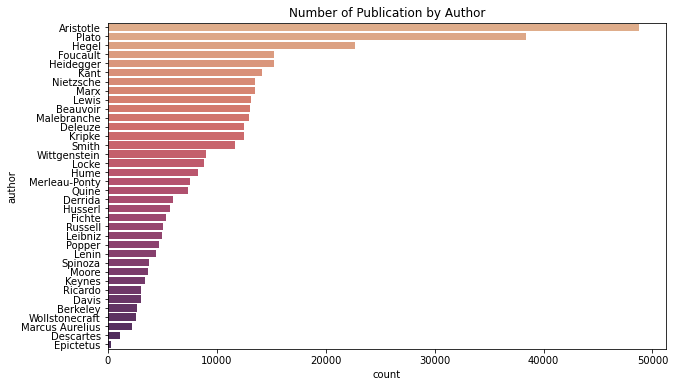

In [15]:
from platform import platform


fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Number of Publication by Author')
sns.countplot(y = 'author', data = df2, order = df2['author'].value_counts().index, palette = 'flare')

Text(0.5, 1.0, 'Number of Contributions to the School of Thought')

<AxesSubplot:title={'center':'Number of Contributions to the School of Thought'}, xlabel='count', ylabel='school'>

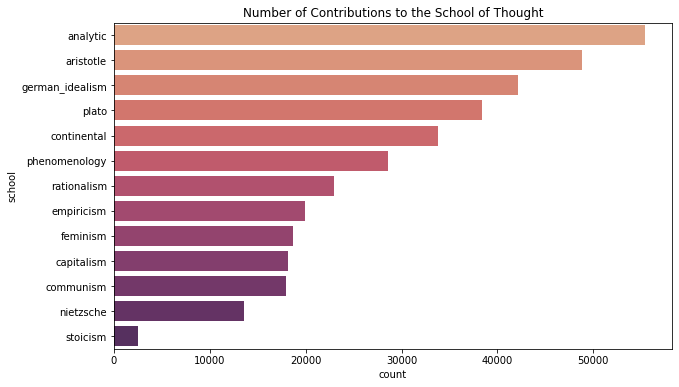

In [16]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Number of Contributions to the School of Thought')
sns.countplot(y = 'school', data = df2, order = df2['school'].value_counts().index, palette = 'flare')

Text(0.5, 1.0, 'Amount of Philosophical Publications Over Time - Modern')

<AxesSubplot:title={'center':'Amount of Philosophical Publications Over Time - Modern'}, xlabel='original_publication_date', ylabel='Count'>

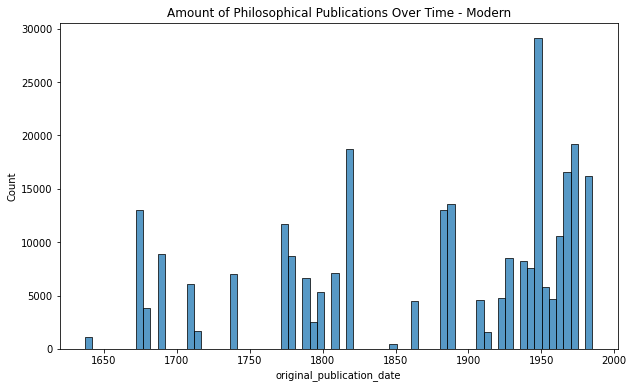

In [17]:
df3 = df2[df2['original_publication_date'] >= 1500]
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Amount of Philosophical Publications Over Time - Modern')
sns.histplot(x='original_publication_date', data = df3)

# Analysis by Authors

In [23]:
df_wordcount = df2.groupby(['author'])['word_count'].mean().reset_index()
df_sentenelength = df2.groupby(['author'])['sentence_length'].mean().reset_index()

<AxesSubplot:xlabel='author', ylabel='word_count'>

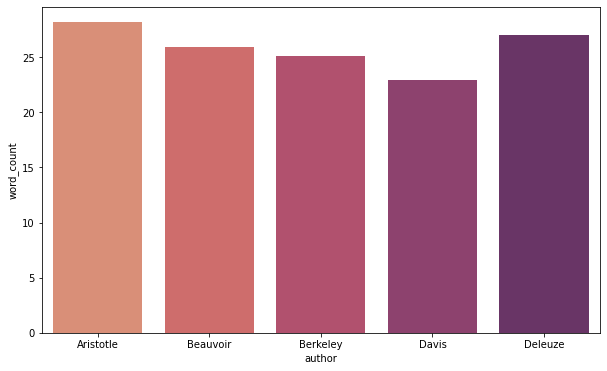

In [24]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
#plt.bar(df_wordcount['author'], df_wordcount['word_count'], width = 0.6)

sns.barplot(x = df_wordcount['author'][0:5], y = df_wordcount['word_count'][0:5], palette = 'flare')

<AxesSubplot:xlabel='author', ylabel='word_count'>

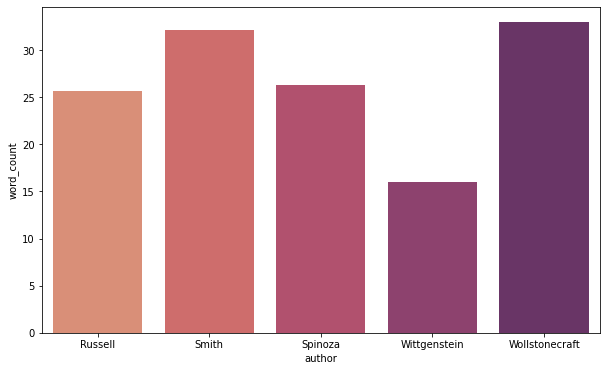

In [25]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
#plt.bar(df_wordcount['author'], df_wordcount['word_count'], width = 0.6)

sns.barplot(x = df_wordcount['author'][31:36], y = df_wordcount['word_count'][31:36], palette = 'flare')

# Analysis by School

In [26]:
df_test = df2.groupby(["school"])['author'].nunique().reset_index()
df_test

,school,author
0,analytic,7
1,aristotle,1
2,capitalism,3
3,communism,2
4,continental,3
5,empiricism,3
6,feminism,3
7,german_idealism,3
8,nietzsche,1
9,phenomenology,3


In [27]:
df_analytic = df2[df2['school'] == 'analytic']
df_german_idealism = df2[df2['school'] == 'german_idealism']
df_continental = df2[df2['school'] == 'continental']
df_phenomenology = df2[df2['school'] == 'phenomenology']
df_rationalism = df2[df2['school'] == 'rationalism']
df_empiricism = df2[df2['school'] == 'empiricism']
df_feminism = df2[df2['school'] == 'feminism']
df_capitalism = df2[df2['school'] == 'capitalism']
df_communism = df2[df2['school'] == 'communism']
df_nietzsche = df2[df2['school'] == 'nietzsche']
df_aristotle = df2[df2['school'] == 'aristotle']
df_plato = df2[df2['school'] == 'plato']
df_stoicism = df2[df2['school'] == 'stoicism']


# Sentiment Change in Topics

Text(0.5, 1.0, 'Sentiment Change of Analytic')

Text(0.5, 1.0, 'Sentiment Change of German Idealism')

Text(0.5, 1.0, 'Sentiment Change of Continental')

Text(0.5, 1.0, 'Sentiment Change of Phenomenology')

Text(0.5, 1.0, 'Sentiment Change of Rationalism')

Text(0.5, 1.0, 'Sentiment Change of Empiricism')

Text(0.5, 1.0, 'Sentiment Change of Feminism')

Text(0.5, 1.0, 'Sentiment Change of Stoicism')

Text(0.5, 1.0, 'Sentiment Change of Communism')

<AxesSubplot:title={'center':'Sentiment Change of Analytic'}, xlabel='original_publication_date', ylabel='sentiment_score'>

<AxesSubplot:title={'center':'Sentiment Change of German Idealism'}, xlabel='original_publication_date', ylabel='sentiment_score'>

<AxesSubplot:title={'center':'Sentiment Change of Continental'}, xlabel='original_publication_date', ylabel='sentiment_score'>

<AxesSubplot:title={'center':'Sentiment Change of Phenomenology'}, xlabel='original_publication_date', ylabel='sentiment_score'>

<AxesSubplot:title={'center':'Sentiment Change of Rationalism'}, xlabel='original_publication_date', ylabel='sentiment_score'>

<AxesSubplot:title={'center':'Sentiment Change of Empiricism'}, xlabel='original_publication_date', ylabel='sentiment_score'>

<AxesSubplot:title={'center':'Sentiment Change of Feminism'}, xlabel='original_publication_date', ylabel='sentiment_score'>

<AxesSubplot:title={'center':'Sentiment Change of Stoicism'}, xlabel='original_publication_date', ylabel='sentiment_score'>

<AxesSubplot:title={'center':'Sentiment Change of Communism'}, xlabel='original_publication_date', ylabel='sentiment_score'>

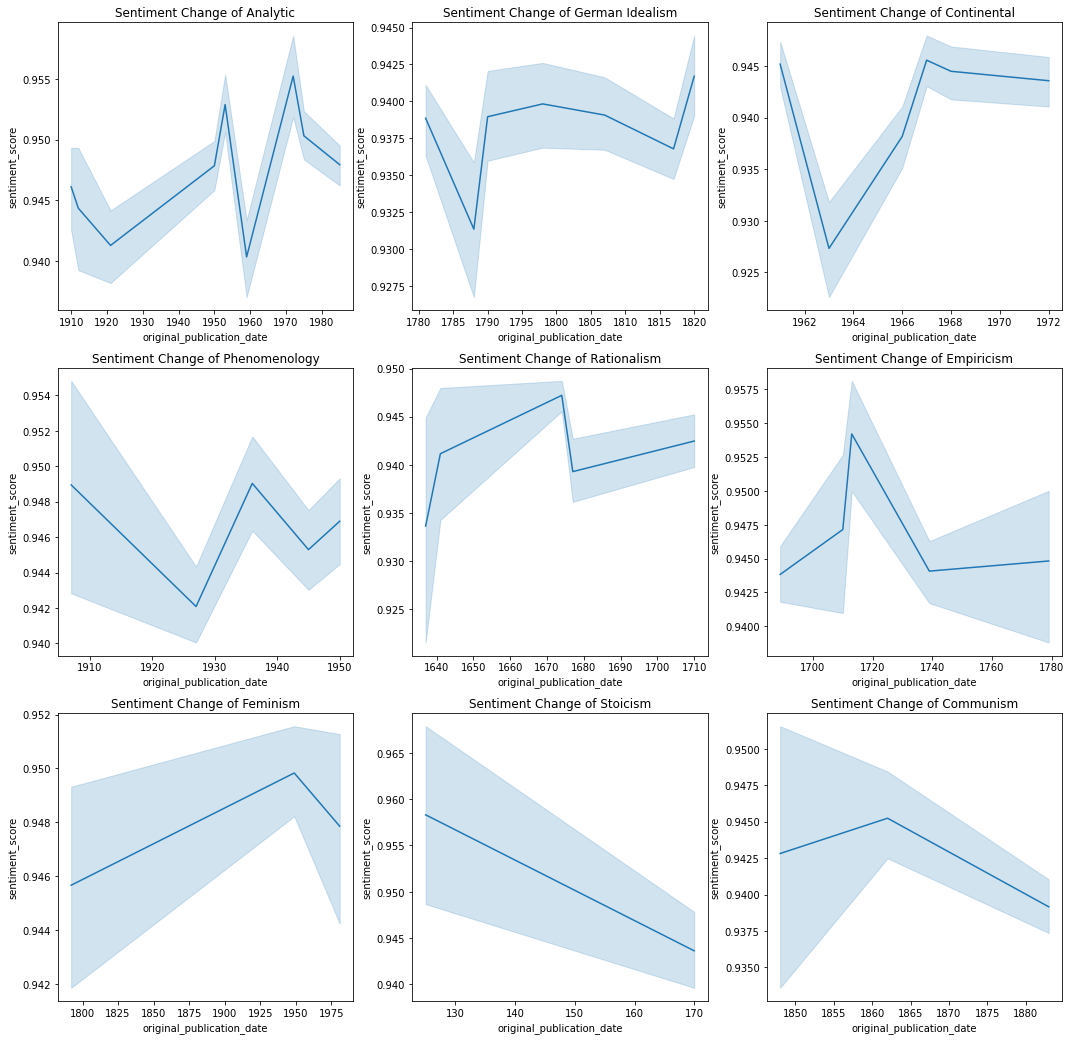

In [84]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

axes[0,0].set_title('Sentiment Change of Analytic')
axes[0,1].set_title('Sentiment Change of German Idealism')
axes[0,2].set_title('Sentiment Change of Continental')
axes[1,0].set_title('Sentiment Change of Phenomenology')
axes[1,1].set_title('Sentiment Change of Rationalism')
axes[1,2].set_title('Sentiment Change of Empiricism')
axes[2,0].set_title('Sentiment Change of Feminism')
axes[2,1].set_title('Sentiment Change of Stoicism')
axes[2,2].set_title('Sentiment Change of Communism')


sns.lineplot(ax = axes[0,0], x='original_publication_date', y= 'sentiment_score', data = df_analytic)
sns.lineplot(ax = axes[0,1], x='original_publication_date', y= 'sentiment_score', data = df_german_idealism)
sns.lineplot(ax = axes[0,2], x='original_publication_date', y= 'sentiment_score', data = df_continental)
sns.lineplot(ax = axes[1,0], x='original_publication_date', y= 'sentiment_score', data = df_phenomenology)
sns.lineplot(ax = axes[1,1], x='original_publication_date', y= 'sentiment_score', data = df_rationalism)
sns.lineplot(ax = axes[1,2], x='original_publication_date', y= 'sentiment_score', data = df_empiricism)
sns.lineplot(ax = axes[2,0], x='original_publication_date', y= 'sentiment_score', data = df_feminism)
sns.lineplot(ax = axes[2,1], x='original_publication_date', y= 'sentiment_score', data = df_stoicism)
sns.lineplot(ax = axes[2,2], x='original_publication_date', y= 'sentiment_score', data = df_communism)

## Authors in Schools

<AxesSubplot:xlabel='count', ylabel='author'>

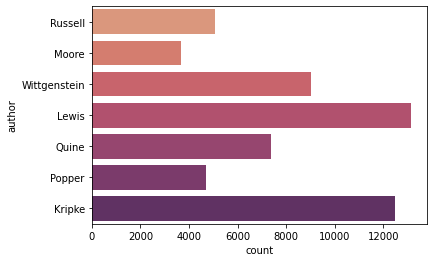

In [28]:
sns.countplot(y = 'author', data = df_analytic, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

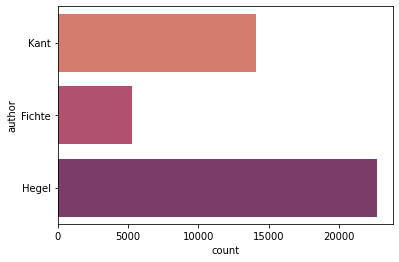

In [29]:
sns.countplot(y = 'author', data = df_german_idealism, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

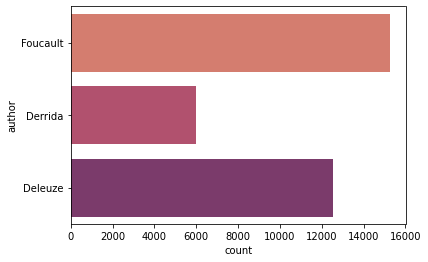

In [30]:
sns.countplot(y = 'author', data = df_continental, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

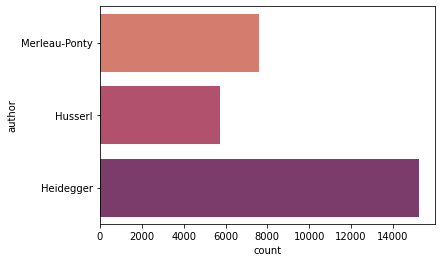

In [31]:
sns.countplot(y = 'author', data = df_phenomenology, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

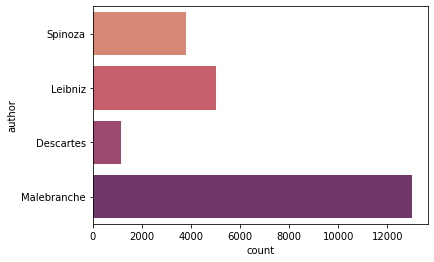

In [32]:
sns.countplot(y = 'author', data = df_rationalism, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

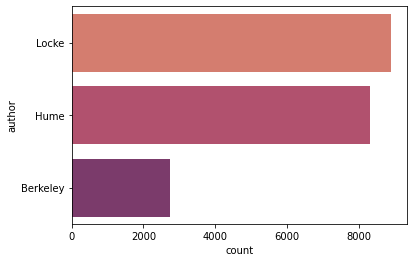

In [33]:
sns.countplot(y = 'author', data = df_empiricism, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

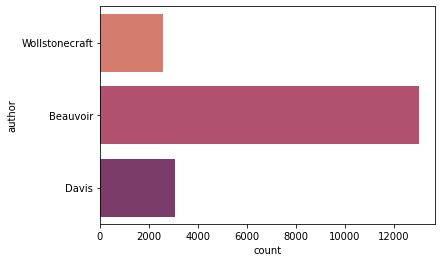

In [34]:
sns.countplot(y = 'author', data = df_feminism, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

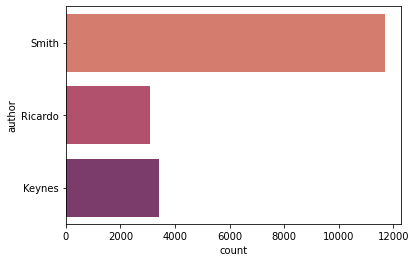

In [35]:
sns.countplot(y = 'author', data = df_capitalism, palette = 'flare')

<AxesSubplot:xlabel='count', ylabel='author'>

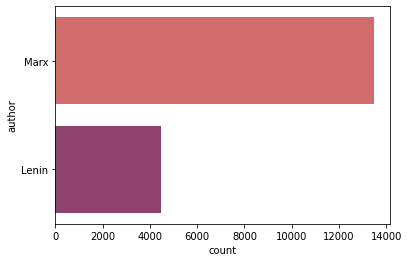

In [36]:
sns.countplot(y = 'author', data = df_communism, palette = 'flare')

In [37]:
#sns.countplot(y = 'author', data = df_nietzsche, palette = 'flare');

In [38]:
#sns.countplot(y = 'author', data = df_aristotle, palette = 'flare');

In [39]:
#sns.countplot(y = 'author', data = df_plato, palette = 'flare');

<AxesSubplot:xlabel='count', ylabel='author'>

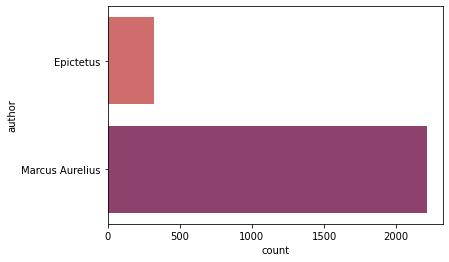

In [40]:
sns.countplot(y = 'author', data = df_stoicism, palette = 'flare')

## Analysis by Schools

In [41]:
df_time = df_modern.groupby(["school",'original_publication_date'])['author'].count().reset_index()

df_time_1900 = df_time[df_time['original_publication_date'] >= 1900]
df_time_1900 = pd.concat([df_time[df_time['school'] == 'feminism'], df_time_1900])
df_time_1900 = df_time_1900[df_time_1900['school'] != 'capitalism']
df_time_1900 = df_time_1900.drop_duplicates()

df_time_1850 = df_time[df_time['original_publication_date'] <= 1850]
df_time_1850 = df_time_1850[df_time_1850['school'] != 'capitalism']
df_time_1850 = df_time_1850[df_time_1850['school'] != 'communism']
df_time_1850 = df_time_1850[df_time_1850['school'] != 'feminism']

df_time_2 = pd.concat([df_time[df_time['school'] == 'communism'], df_time[df_time['school'] == 'capitalism']])

In [42]:
# fig,ax = plt.subplots()
# fig.set_size_inches(10,6)
# sns.lineplot(x='original_publication_date', y= 'author', hue = 'school', data = df_time);

<AxesSubplot:xlabel='original_publication_date', ylabel='author'>

(1900.0, 1994.65)

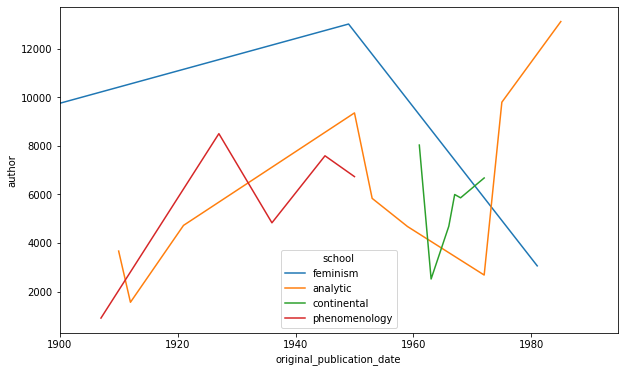

In [43]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
sns.lineplot(x='original_publication_date', y= 'author', hue = 'school', data = df_time_1900)
ax.set_xlim(1900, )

<AxesSubplot:xlabel='original_publication_date', ylabel='author'>

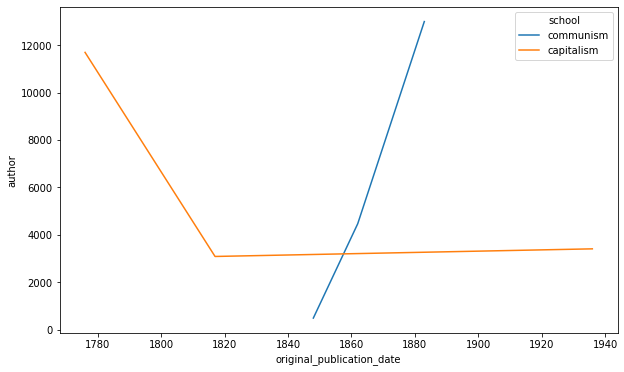

In [44]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
sns.lineplot(x='original_publication_date', y= 'author', hue = 'school', data = df_time_2)

<AxesSubplot:xlabel='original_publication_date', ylabel='author'>

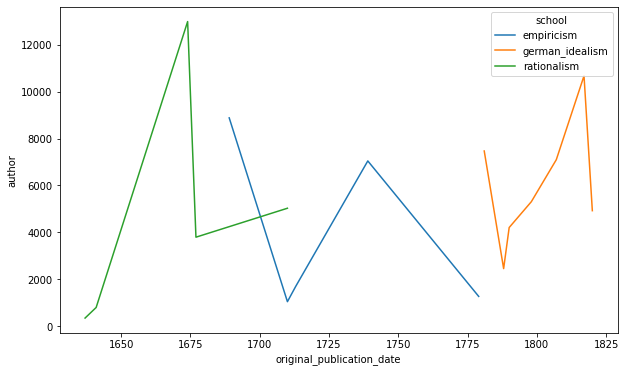

In [45]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
sns.lineplot(x='original_publication_date', y= 'author', hue = 'school', data = df_time_1850)

# Sentiment Analysis

In [46]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [86]:
df_plato = df2[df2['author'] == 'Plato']
df_aristotle = df2[df2['author'] == 'Aristotle']
df_hegel = df2[df2['author'] == 'Hegel']
df_foucault = df2[df2['author'] == 'Foucault']
df_heidegger = df2[df2['author'] == 'Heidegger']

In [155]:
## Get the bar chart for Plato ##
freq_dict = defaultdict(int)
for sent in df_plato["sentence_lowered"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'maroon')

## Get the bar chart for Aristotle ##
freq_dict = defaultdict(int)
for sent in df_aristotle["sentence_lowered"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace1 = horizontal_bar_chart(fd_sorted.head(10), 'maroon')

## Get the bar chart for Hegel ##
freq_dict = defaultdict(int)
for sent in df_hegel["sentence_lowered"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace2 = horizontal_bar_chart(fd_sorted.head(10), 'maroon')

## Get the bar chart for Foucault ##
freq_dict = defaultdict(int)
for sent in df_foucault["sentence_lowered"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace3 = horizontal_bar_chart(fd_sorted.head(10), 'maroon')

## Get the bar chart for Heidegger ##
freq_dict = defaultdict(int)
for sent in df_heidegger["sentence_lowered"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace4 = horizontal_bar_chart(fd_sorted.head(10), 'maroon')


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=5, horizontal_spacing=0.15,
                          subplot_titles=["Plato",
                                          "Aristotle",
                                          "Hegel",
                                          "Foucault",
                                          "Heidegger"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 1, 4)
fig.append_trace(trace4, 1, 5)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Plato',
                     'x': 0.04,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Aristotle',
                     'x': 0.27,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Hegel',
                     'x': 0.49999999999999994,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
               

In [49]:
# classify how people think about the world
# how the topics of discussions have changed over time
# what certain authors' were concerned about the most
# how the sentiment of a certain topic changed over time
# how the sentiment of a certain topic changed over time - hue authors
# the author's sentence type (length, their frequently used vocab)
# what where the most firmly held beliefs.
#Clustering
#google how to hide jupyter notebook code
